# Pi


## Estimating most probable value of Pi using MCMC

Inorder to undertand different aspects of MCMC which we just went through, we will do some basic examples. 

Lets start with single parameter estimation - the value of Pi. 

Lets import all the packages needed.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
import random
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

np.random.seed(1)

The algorithm is simple. 
1) First we need data to compare our model with. Lets generate some (how many? - number set by number_of_data) circles of radius r in certian range. 

2) We have used Pi value from numpy to get area of these circles. But if we had to build some circles by hand, and measure their area, then there would have been errors. Hence, we add some random errors to our very accurate date. Now we have a realistic data to compare our model with.  

3) Now area of a circle is an irrational number. To get a good measure of Pi, we have to estimate areas of these circles precisely.   

In [19]:
number_of_data = 100

def generate_data(number_of_data):
    r = np.array([random.uniform(0,10) for _ in range(number_of_data)])
    A = np.pi * r**2 + np.random.randint(0, 10) * random.random()
    return r, A

radius, area = generate_data(number_of_data)

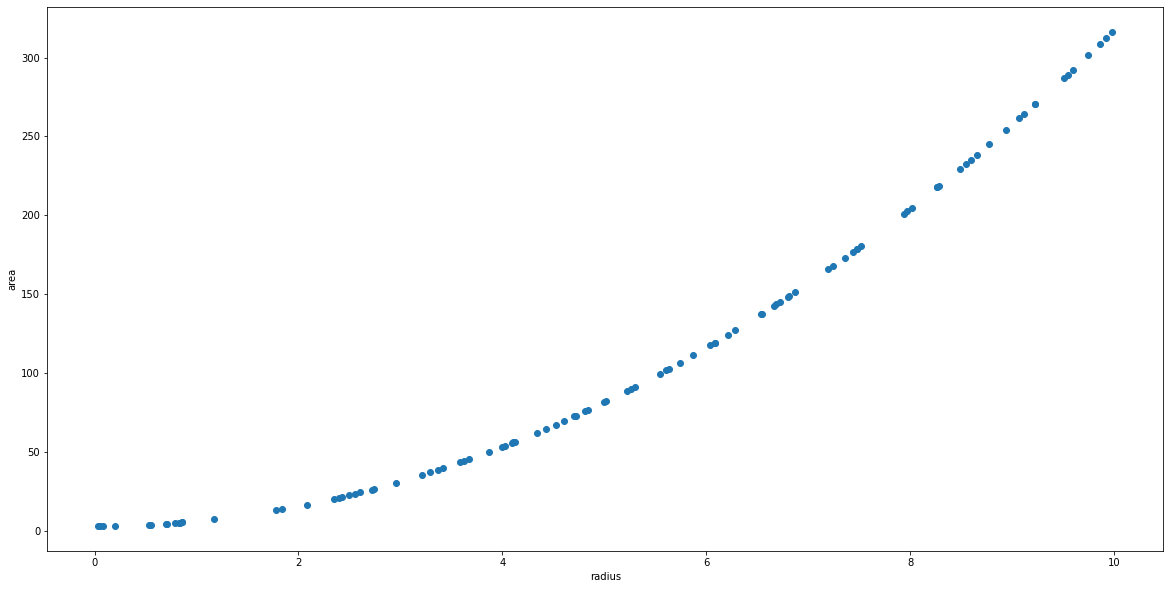

In [20]:
plt.scatter(radius, area) 
plt.xlabel('radius')
plt.ylabel('area')
plt.show()

### Model

The model is very simple - just the area of the circle that is a constant 'a' multiplied by radius squared. The aim of our program is to see what is the most preferred value of 'a'. 

In [21]:
def model(theta,radius=radius):
    a = theta
    return a * radius**2

### Likelihood Fucntion

We will use the simplest Liklihood Function, with Gaussian variance (yerr)^2. 

In [22]:
def lnlike(theta, x, y, yerr):
    return -0.5 * np.sum(((y - model(theta, x))/yerr) ** 2)

### Prior

We have to set the parameter space by defining a sensible bounds to our model parameter(s). 

In [23]:
def lnprior(theta):
    a = theta
    if 0.0 < a < 5.0:
        return 0.0
    return -np.inf

### Posterior Probability Distribution

In [24]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [25]:
area_err = 0.05 * np.mean(area)
data = (radius, area, area_err)
nwalkers = 16
niter = 500
initial = np.array([1.0])
ndim = len(initial)
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

### EMCEE

In [26]:
def main(p0,nwalkers,niter,ndim,lnprob,data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)

    return sampler, pos, prob, state

In [27]:
sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,lnprob,data)

Running burn-in...
Running production...


In [28]:
def plotter(sampler,radius=radius,area=area):
    plt.ion()
    plt.scatter(radius, area, marker='s', s = 150, c = 'y')
    samples = sampler.flatchain
    radius = np.sort(radius)
    for theta in samples[np.random.randint(len(samples), size=100)]:
        plt.plot(radius, model(theta, radius), color="r", alpha=0.1)
    plt.plot(radius, np.pi * radius ** 2, c='k' )
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xlabel('radius')
    plt.ylabel('area')
    plt.show()

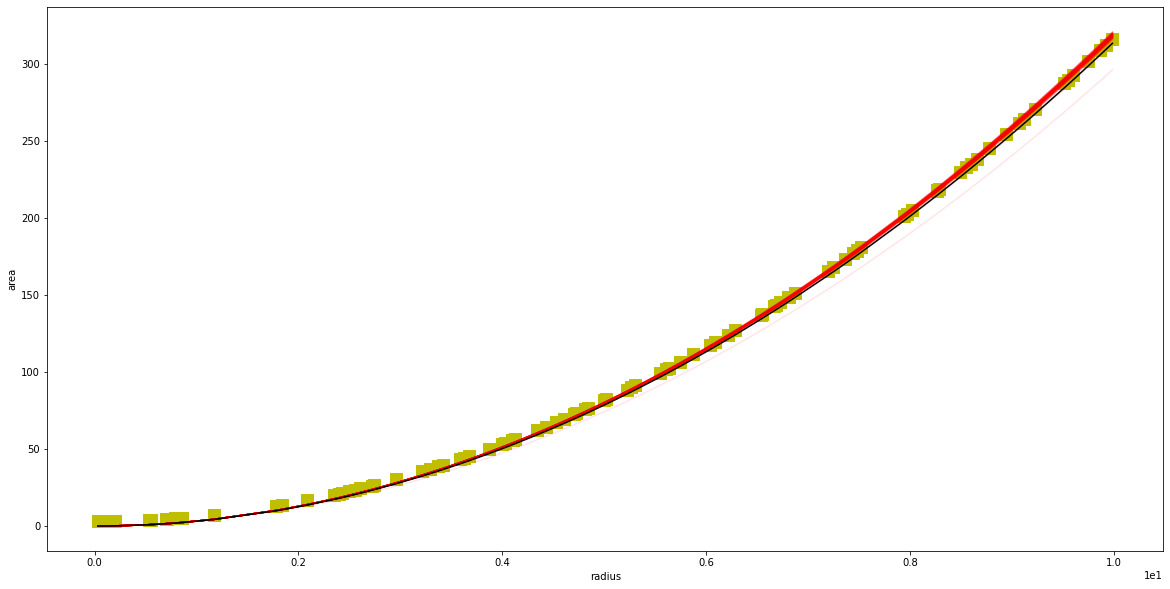

In [35]:
plotter(sampler)

In [32]:
samples = sampler.flatchain
samples[np.argmax(sampler.flatlnprobability)]

array([3.19224745])